In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

from vendas import dados_vendas

df_vendas = pd.DataFrame.from_dict(dados_vendas)



In [138]:
# Adicionando tabela com mês representado por um número
df_vendas["mes_numero"] = df_vendas['mes'].index + 1

df_vendas.head(3)

,mes,vendas,mes_numero
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3


In [139]:
X = df_vendas['mes_numero']
y=df_vendas['vendas']

In [140]:
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)



In [141]:
model = LinearRegression().fit(X_train.to_frame(), y_train.to_frame())

In [142]:
y_pred = model.predict(X_test.to_frame())
y_pred

array([[3223.80952381],
       [3114.28571429],
       [2128.57142857],
       [3004.76190476]])

In [143]:
model.score(X_train.to_frame(),y_train.to_frame())

0.9900187149095446

In [144]:
model.score(X_test.to_frame(), y_test.to_frame())

0.9813215492845836

In [145]:
mse = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

mse,r2

(np.float64(42.85714285714289), 0.9813215492845836)

In [146]:
model.intercept_, model.coef_

(array([2019.04761905]), array([[109.52380952]]))

In [147]:
# previsão para dezembro
# Prever as vendas para o mês de Dezembro (mes_numero = 12)
previsao_dezembro = model.predict([[12]])

round(previsao_dezembro[0][0])

c:\Users\stone\.virtualenvs\desafio-ia-primeiro-modelo-SaSVphIo\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3333

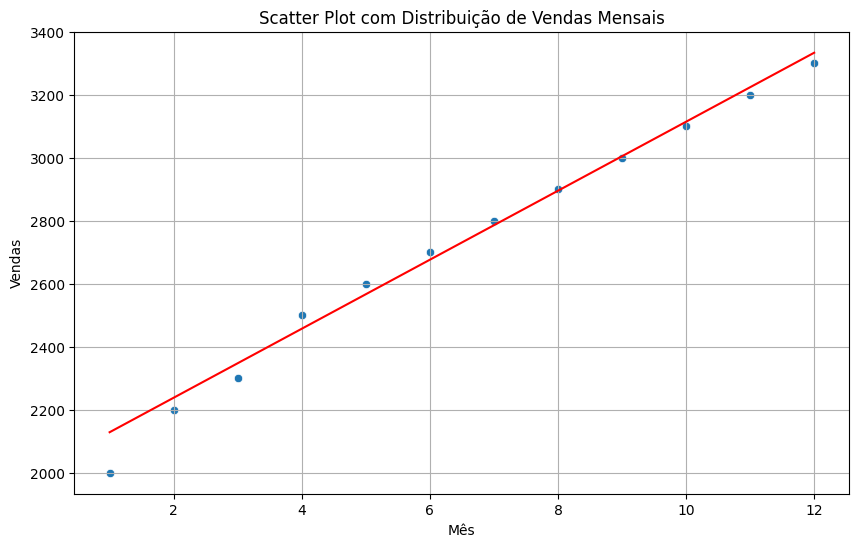

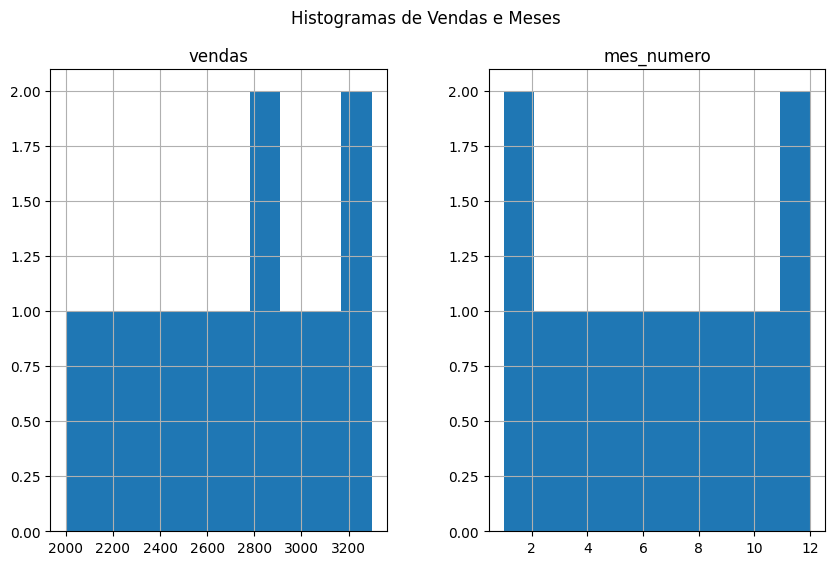

In [148]:
# Plot de Scatter com distribuição
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_numero'], model.predict(df_vendas[['mes_numero']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

# Histograma de todas as variáveis
df_vendas.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()